# Aprendizaje Supervisado
# UdeSA, 2023
## Profesores: Marcela Svarc, Juan Manuel Pérez


## TP: Clasificación de tópicos de noticias
### Análisis exploratorio



In [1]:
import matplotlib.pyplot as plt
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns



## Conjunto de datos



Vamos a utilizar el conjunto de datos [AG News](https://huggingface.co/datasets/ag_news). Cada instancia del conjunto de datos consiste en un título y un cuerpo de una noticia, y una etiqueta que indica la categoría a la que pertenece. Las categorías son: 'World', 'Sports', 'Business' y 'Sci/Tech'.

| Texto                                                                                           | Categoría |
| ----------------------------------------------------------------------------------------------- | --------- |
| Wall St. Bears Claw Back Into the Black (Reuters) Reuters -.                                    | Business  |
| VIEW: Arafats ghost Barry Rubin Rarely in history has a political movement ...                  | World     |
| Tough loss for Pavano, Marlins ATLANTA -- All-Star pitcher Carl Pavano ...                      | Sports    |
| Digital ways to have fun including an HP-branded version of Apple's iPod - designed with an ... | Sci/Tech  |


In [3]:
# Con esto lo bajamos de este repositorio centralizado
ds = load_dataset("ag_news")
ds

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 120000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 7600
    })
})

Vemos que la muestra de entrenamiento tiene 120000 noticias, y la de prueba 7600 noticias.

In [4]:
# Convertimos a pandas

id2label = ds["train"].features["label"].names

df_train = ds["train"].to_pandas()

df_test = ds["test"].to_pandas()

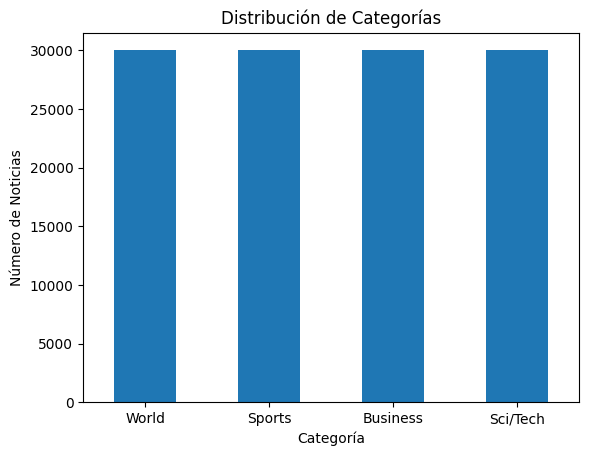

In [5]:
# Cantidad de noticias por categoría
noticias_categoria = df_train['label'].value_counts()

# Gráfico
noticias_categoria.plot(kind='bar')  
plt.title('Distribución de Categorías')
plt.xlabel('Categoría')
plt.ylabel('Número de Noticias')
plt.xticks([0,1,2,3], ['World', 'Sports', 'Business', 'Sci/Tech'], rotation=0)
plt.show()


Se ve en el gráfico de arriba que la distribución de las noticias por categoría en la muestra de entrenamiento es bastante equilibrada y todas están representadas en proporciones similares en la muestra de entrenamiento.

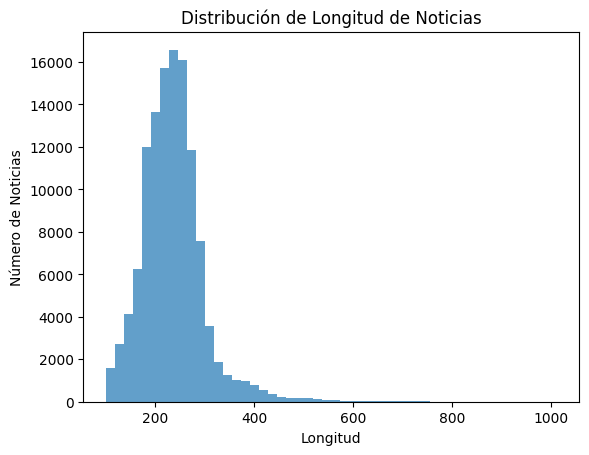

In [6]:
# Calculamos la longitud de cada noticia
df_train['text_length'] = df_train['text'].apply(len)

# Visualizar la distribución de longitudes
plt.hist(df_train['text_length'], bins=50, alpha=0.7)
plt.title('Distribución de Longitud de Noticias')
plt.xlabel('Longitud')
plt.ylabel('Número de Noticias')
plt.show()


En el histograma se puede observar la frecuencia de noticias según su longitud. La mayoría de las noticias tienen una longitud que está en el rango de 200 a 400 palabras. La distibución es bastante simétrica, sugiriendo una distribución normal o gaussiana. Esto, podría estar dando un indicio de que no hay un sesgo hacia noticias muy cortas o muy largas.

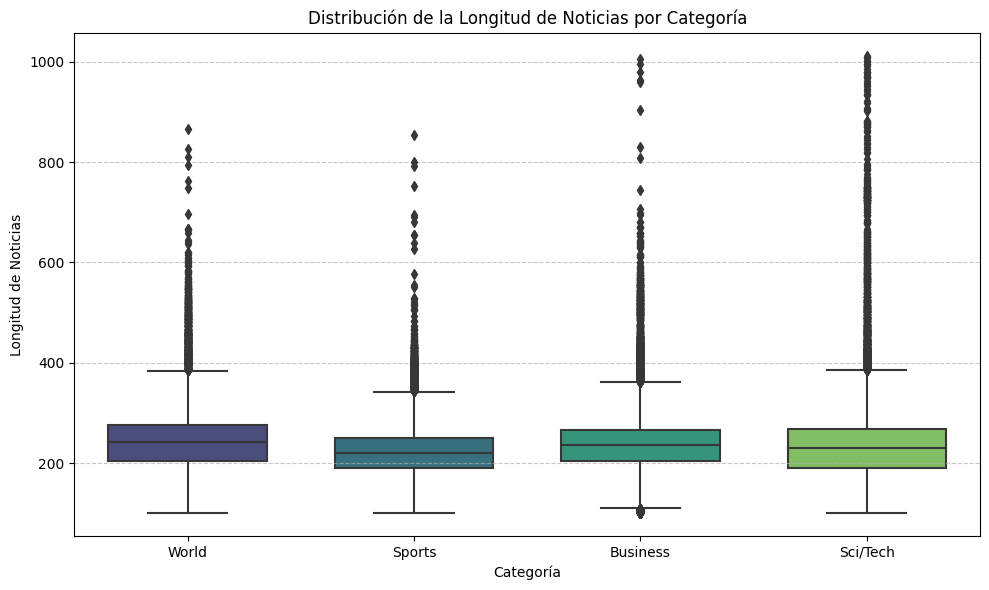

In [7]:
# Creamos una nueva columna en el DataFrame para la longitud de las noticias
df_train['length'] = df_train['text'].apply(len)

# Generamos el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='text_length', data=df_train, palette='viridis', width=0.7, saturation=0.7)
plt.title('Distribución de la Longitud de Noticias por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Longitud de Noticias')
plt.xticks([0,1,2,3], ['World', 'Sports', 'Business', 'Sci/Tech'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

